In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-cars-price-prediction/test-data.csv
/kaggle/input/used-cars-price-prediction/train-data.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/kaggle/input/used-cars-price-prediction/train-data.csv")

In [4]:
df.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [5]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
df.shape


(6019, 14)

In [7]:
df.isna().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

In [8]:
df.columns


Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [9]:
df = df.drop(["New_Price" ,'Unnamed: 0'] , axis = 1)

In [10]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
df.isna().mean()

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
Price                0.000000
dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [13]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [14]:
df.describe(include = "object")

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,6019,6019,6019,6019,6019,6017,5983,5983
unique,1876,11,5,2,4,442,146,372
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,790,3205,4299,4929,172,606,235


In [15]:
numerical = df.select_dtypes(include = np.number)

In [16]:
numerical


,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74
...,...,...,...,...
6014,2014,27365,5.0,4.75
6015,2015,100000,5.0,4.00
6016,2012,55000,8.0,2.90
6017,2013,46000,5.0,2.65


In [17]:
categorical = df.select_dtypes(include ='object')

In [18]:
categorical

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp
...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp
6017,Maruti Wagon R VXI,Kolkata,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp


In [19]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [20]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [21]:
df["Kilometers_Driven"].describe()

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

In [22]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [23]:
df.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [24]:
df[['Company', 'Model', 'Variant']] = df['Name'].str.split(' ', n=2, expand=True)


In [25]:
df = df.drop("Name" , axis =1)

In [26]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


In [27]:
cat = df.select_dtypes("object")

In [28]:
cat

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Company,Model,Variant
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,Maruti,Wagon,R LXI CNG
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,Honda,Jazz,V
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,Maruti,Ertiga,VDI
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,Maruti,Swift,VDI
6015,Jaipur,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,Mahindra,Xylo,D4 BSIV
6017,Kolkata,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,Maruti,Wagon,R VXI


In [29]:
for col in cat:
    print(col)
    print(df[col].nunique())

Location
11
Fuel_Type
5
Transmission
2
Owner_Type
4
Mileage
442
Engine
146
Power
372
Company
31
Model
212
Variant
1738


In [30]:
df.Engine = pd.to_numeric(df.Engine.str.split(' ').str[0], errors='coerce')

# df.Power = pd.to_numeric(df.Power.str.split(' ').str[0], errors='coerce')

In [31]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248.0,74 bhp,5.0,4.75,Maruti,Swift,VDI
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120.0,71 bhp,5.0,4.00,Hyundai,Xcent,1.1 CRDi S
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498.0,112 bhp,8.0,2.90,Mahindra,Xylo,D4 BSIV
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998.0,67.1 bhp,5.0,2.65,Maruti,Wagon,R VXI


In [32]:
df.Power = pd.to_numeric(df["Power"].str.split(" ",n= 1).str[0] , errors='coerce')

In [33]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic


In [34]:
mask = df["Mileage"].str.split(" ", n=1).str[-1] == "km/kg"

df["Mileage_Numeric"] = pd.to_numeric(df["Mileage"].str.split(" ", n=1).str[0], errors='coerce')

df.loc[mask, "Mileage_Numeric"] = df.loc[mask, "Mileage_Numeric"] * 1.4



# (الخطوة الأخيرة دي اختيارية بس بتخلي الكود أنظف)
# del df["Mileage_Numeric"]

In [35]:
df.head(13)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20
5,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814.0,55.20,5.0,2.35,Hyundai,EON,LPG Era Plus Option,29.54
6,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461.0,63.10,5.0,3.50,Nissan,Micra,Diesel XV,23.08
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755.0,171.50,8.0,17.50,Toyota,Innova,Crysta 2.8 GX AT 8S,11.36
8,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598.0,103.60,5.0,5.20,Volkswagen,Vento,Diesel Comfortline,20.54
9,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248.0,74.00,5.0,1.95,Tata,Indica,Vista Quadrajet LS,22.30


In [36]:
df["Year"].isna().sum()

0

In [37]:
df["Age"] = df["Year"].max()+1 - df["Year"]

In [38]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [39]:
df.drop(columns =["Year"] ,inplace = True)

In [40]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [41]:
df.isna().sum()

Location               0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Company                0
Model                  0
Variant                0
Mileage_Numeric        2
Age                    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   int64  
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Mileage            6017 non-null   object 
 6   Engine             5983 non-null   float64
 7   Power              5876 non-null   float64
 8   Seats              5977 non-null   float64
 9   Price              6019 non-null   float64
 10  Company            6019 non-null   object 
 11  Model              6019 non-null   object 
 12  Variant            6019 non-null   object 
 13  Mileage_Numeric    6017 non-null   float64
 14  Age                6019 non-null   int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 705.5+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


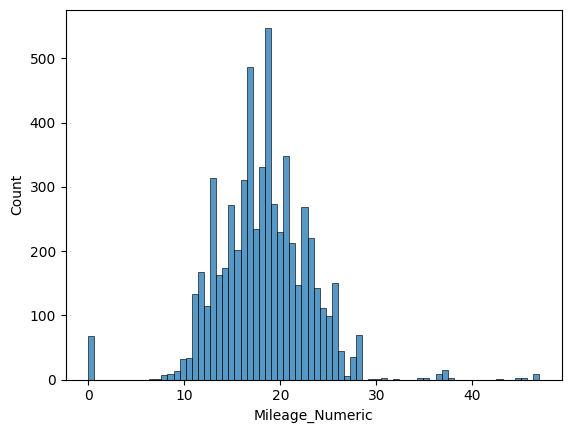

In [43]:
sns.histplot(data = df , x = "Mileage_Numeric")
plt.show()


In [44]:
df["Mileage_Numeric"] = df["Mileage_Numeric"].fillna(df["Mileage_Numeric"].median() )

In [45]:
df["Mileage_Numeric"].isna().sum()

0

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


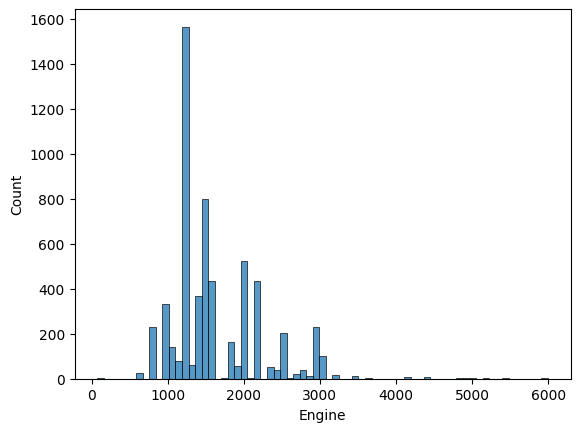

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


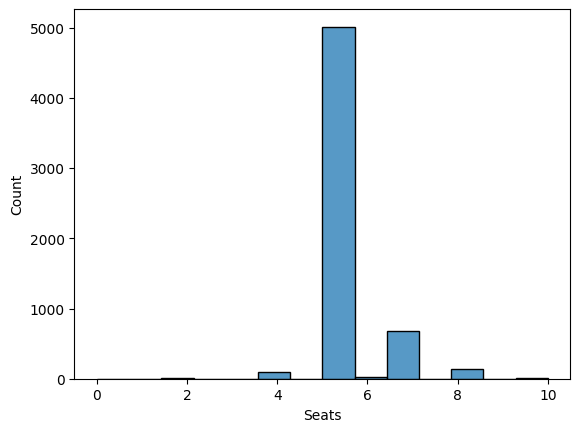

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


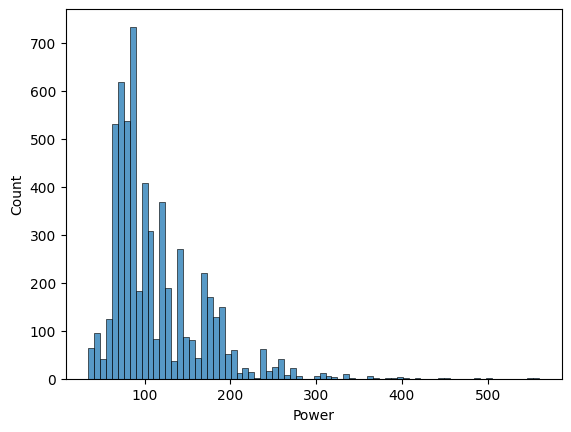

In [46]:
for col in ["Engine" ,"Seats","Power"]:
    sns.histplot(df[col])
    plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


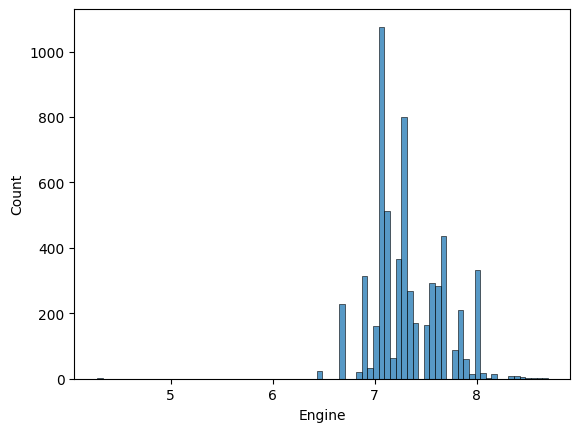

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


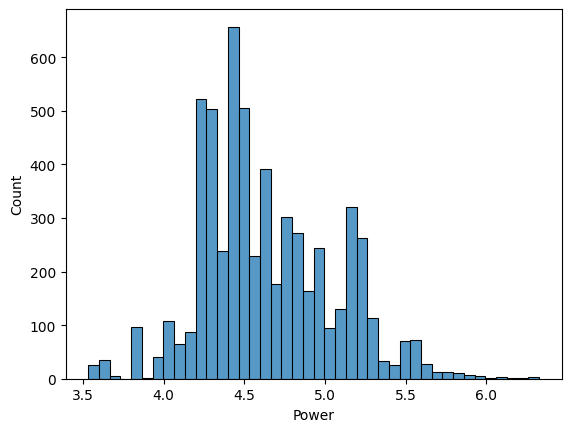

In [47]:
for col in ["Engine" ,"Power" ]:
    df[col] = np.log(df[col])
    sns.histplot(df[col])
    plt.show()
    

In [48]:
for col in ["Engine" ,"Seats","Power"]:
  df[col] = df[col].fillna(df[col].median())

In [49]:
df.isna().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Company              0
Model                0
Variant              0
Mileage_Numeric      0
Age                  0
dtype: int64

In [50]:
df = df.drop(columns =["Mileage"])

In [51]:
df.head(
)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,37.24,10
1,Pune,41000,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5
2,Chennai,46000,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9
3,Chennai,87000,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8
4,Coimbatore,40670,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7


In [52]:
print(df.describe(include = "object"))
print(df.describe(exclude = "object"))

       Location Fuel_Type Transmission Owner_Type Company  Model Variant
count      6019      6019         6019       6019    6019   6019    6019
unique       11         5            2          4      31    212    1738
top      Mumbai    Diesel       Manual      First  Maruti  Swift     VDI
freq        790      3205         4299       4929    1211    353      79
       Kilometers_Driven       Engine        Power        Seats        Price  \
count       6.019000e+03  6019.000000  6019.000000  6019.000000  6019.000000   
mean        5.873838e+04     7.330726     4.636217     5.276790     9.479468   
std         9.126884e+04     0.339275     0.411565     0.806346    11.187917   
min         1.710000e+02     4.276666     3.532226     0.000000     0.440000   
25%         3.400000e+04     7.088409     4.356709     5.000000     3.500000   
50%         5.300000e+04     7.308543     4.581902     5.000000     5.640000   
75%         7.300000e+04     7.585281     4.927471     5.000000     9.95000

In [53]:
df.isna().sum()

Location             0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
Price                0
Company              0
Model                0
Variant              0
Mileage_Numeric      0
Age                  0
dtype: int64

In [54]:
df.describe()

,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_Numeric,Age
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,7.330726,4.636217,5.276790,9.479468,18.242456,6.641801
std,9.126884e+04,0.339275,0.411565,0.806346,11.187917,4.878822,3.269742
min,1.710000e+02,4.276666,3.532226,0.000000,0.440000,0.000000,1.000000
25%,3.400000e+04,7.088409,4.356709,5.000000,3.500000,15.260000,4.000000
50%,5.300000e+04,7.308543,4.581902,5.000000,5.640000,18.190000,6.000000
75%,7.300000e+04,7.585281,4.927471,5.000000,9.950000,21.100000,9.000000
max,6.500000e+06,8.699181,6.327937,10.000000,160.000000,46.956000,22.000000


In [55]:
numeric = df.select_dtypes(np.number).drop("Seats" , axis = 1)
numeric

,Kilometers_Driven,Engine,Power,Price,Mileage_Numeric,Age
0,72000,6.905753,4.063198,1.75,37.24,10
1,41000,7.366445,4.837868,12.50,19.67,5
2,46000,7.089243,4.485260,4.50,18.20,9
3,87000,7.129298,4.485936,6.00,20.77,8
4,40670,7.584773,4.947340,17.74,15.20,7
...,...,...,...,...,...,...
6014,27365,7.129298,4.304065,4.75,28.40,6
6015,100000,7.021084,4.262680,4.00,24.40,5
6016,55000,7.823246,4.718499,2.90,14.00,8
6017,46000,6.905753,4.206184,2.65,18.90,7


In [56]:
numeric.columns

Index(['Kilometers_Driven', 'Engine', 'Power', 'Price', 'Mileage_Numeric',
       'Age'],
      dtype='object')

In [57]:
for col in numeric:
    

            # الخطوة 1: حساب الـ Quartiles والـ IQR لكل عمود
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
        
            # الخطوة 2: تحديد الحدود العليا والسفلى
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
        
            # الخطوة 3: معالجة الـ outliers باستخدام الـ "Capping" (الحد)
            # أي قيمة أكبر من الحد الأقصى هتساوي الحد الأقصى
            df[col] = np.where(
                df[col] > upper_limit,
                upper_limit,
                df[col]
            )
        
            # أي قيمة أقل من الحد الأدنى هتساوي الحد الأدنى
            df[col] = np.where(
                df[col] < lower_limit,
                lower_limit,
                df[col]
            )

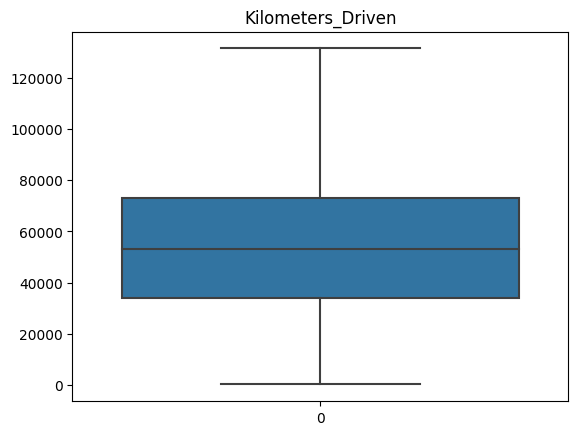

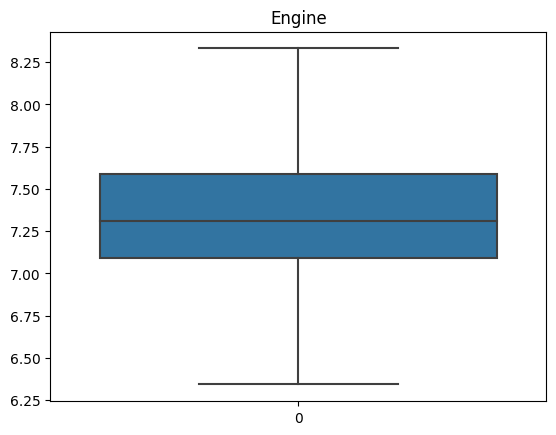

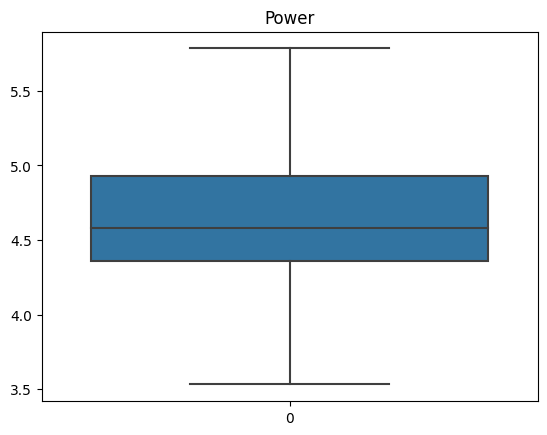

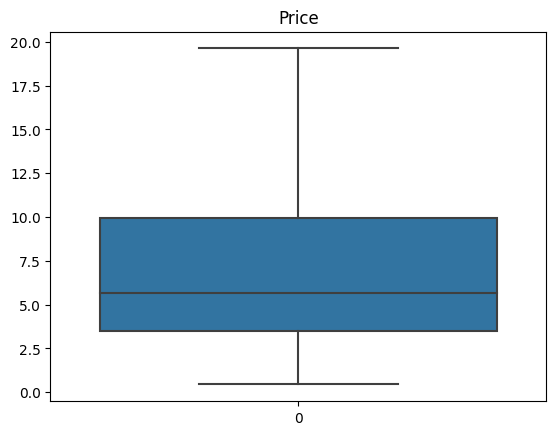

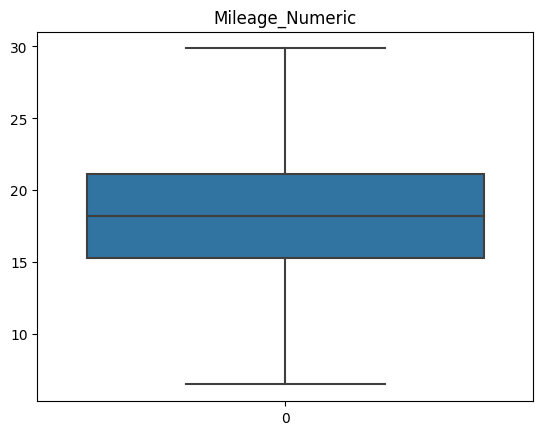

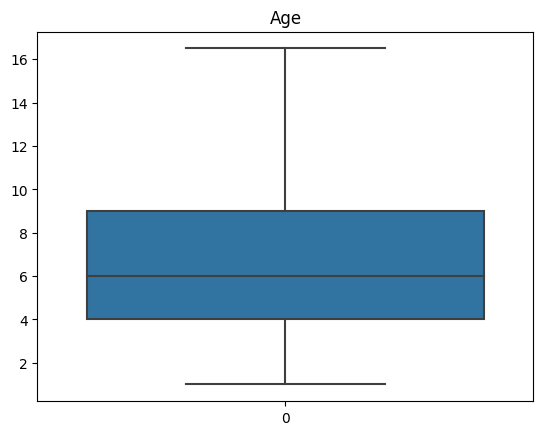

In [58]:
for col in numeric:
    
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [59]:
df["Seats"].nunique()

9

In [60]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000.0,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,29.86,10.0
1,Pune,41000.0,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5.0
2,Chennai,46000.0,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9.0
3,Chennai,87000.0,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8.0
4,Coimbatore,40670.0,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7.0


In [61]:
df.describe()

,Kilometers_Driven,Engine,Power,Seats,Price,Mileage_Numeric,Age
count,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,56106.896661,7.330574,4.635111,5.276790,7.708463,18.244538,6.625851
std,30040.626708,0.335595,0.408022,0.806346,5.769853,4.370277,3.213540
min,171.000000,6.343100,3.532226,0.000000,0.440000,6.500000,1.000000
25%,34000.000000,7.088409,4.356709,5.000000,3.500000,15.260000,4.000000
50%,53000.000000,7.308543,4.581902,5.000000,5.640000,18.190000,6.000000
75%,73000.000000,7.585281,4.927471,5.000000,9.950000,21.100000,9.000000
max,131500.000000,8.330590,5.783614,10.000000,19.625000,29.860000,16.500000


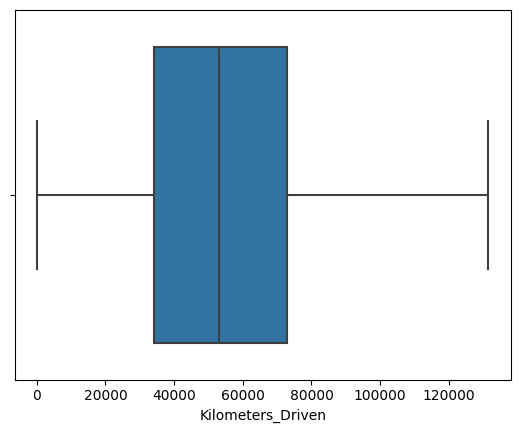

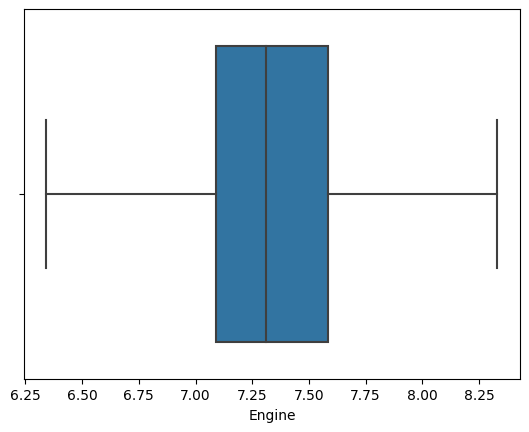

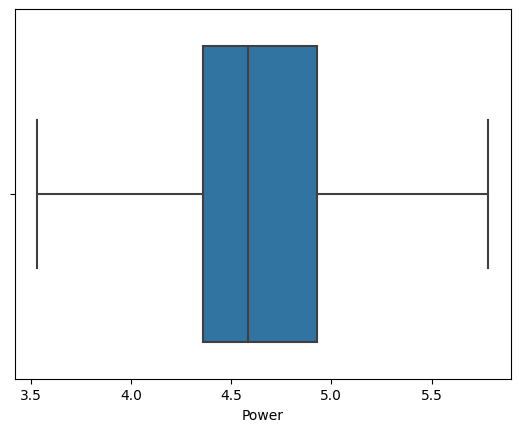

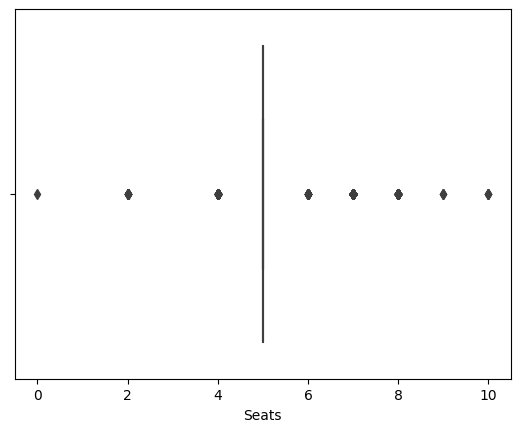

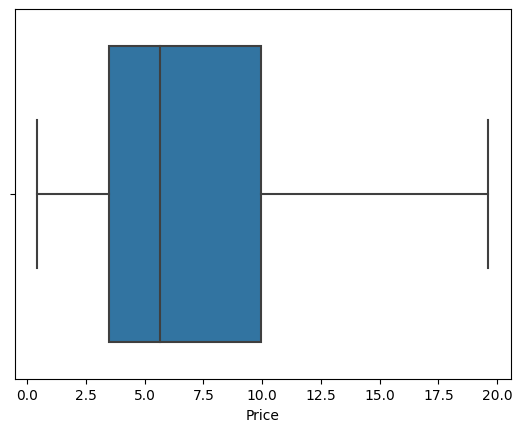

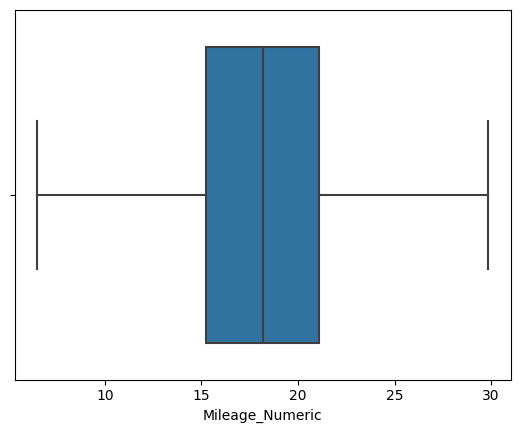

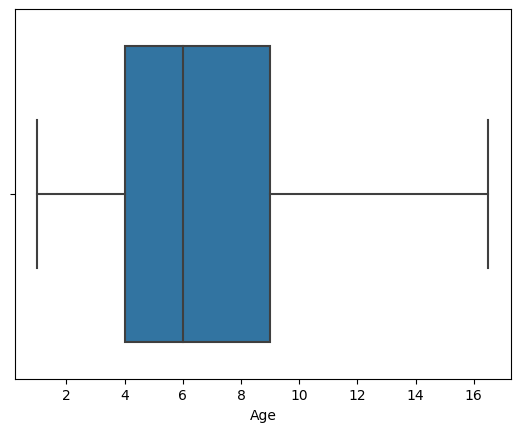

In [62]:
numeric = df.select_dtypes(np.number)
for col in numeric:
    sns.boxplot(data = df , x = col)
    plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Kilometers_Driven  6019 non-null   float64
 2   Fuel_Type          6019 non-null   object 
 3   Transmission       6019 non-null   object 
 4   Owner_Type         6019 non-null   object 
 5   Engine             6019 non-null   float64
 6   Power              6019 non-null   float64
 7   Seats              6019 non-null   float64
 8   Price              6019 non-null   float64
 9   Company            6019 non-null   object 
 10  Model              6019 non-null   object 
 11  Variant            6019 non-null   object 
 12  Mileage_Numeric    6019 non-null   float64
 13  Age                6019 non-null   float64
dtypes: float64(7), object(7)
memory usage: 658.5+ KB


In [64]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()

In [65]:
x_train = df.drop("Price" , axis =1)
y_train = df[["Price"]]
print(x_train )
print(y_train)

        Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0         Mumbai            72000.0       CNG       Manual      First   
1           Pune            41000.0    Diesel       Manual      First   
2        Chennai            46000.0    Petrol       Manual      First   
3        Chennai            87000.0    Diesel       Manual      First   
4     Coimbatore            40670.0    Diesel    Automatic     Second   
...          ...                ...       ...          ...        ...   
6014       Delhi            27365.0    Diesel       Manual      First   
6015      Jaipur           100000.0    Diesel       Manual      First   
6016      Jaipur            55000.0    Diesel       Manual     Second   
6017     Kolkata            46000.0    Petrol       Manual      First   
6018   Hyderabad            47000.0    Diesel       Manual      First   

        Engine     Power  Seats    Company   Model                  Variant  \
0     6.905753  4.063198    5.0     Maruti  

In [66]:
RS.fit_transform(x_train.select_dtypes(np.number))

array([[ 4.87179487e-01, -8.10649982e-01, -9.08791266e-01,
         0.00000000e+00,  1.99828767e+00,  8.00000000e-01],
       [-3.07692308e-01,  1.16533666e-01,  4.48464140e-01,
         0.00000000e+00,  2.53424658e-01, -2.00000000e-01],
       [-1.79487179e-01, -4.41360169e-01, -1.69320367e-01,
         0.00000000e+00,  1.71232877e-03,  6.00000000e-01],
       ...,
       [ 5.12820513e-02,  1.03588567e+00,  2.39324374e-01,
         3.00000000e+00, -7.17465753e-01,  4.00000000e-01],
       [-1.79487179e-01, -8.10649982e-01, -6.58273267e-01,
         0.00000000e+00,  1.21575342e-01,  2.00000000e-01],
       [-1.53846154e-01, -9.39733048e-01, -9.25742747e-01,
         0.00000000e+00,  1.24143836e+00,  6.00000000e-01]])

In [67]:
from sklearn.preprocessing import LabelEncoder ,OrdinalEncoder
LE = LabelEncoder()
OE = OrdinalEncoder

In [68]:
categorical_cols = x_train.select_dtypes(include='object').columns
categorical_cols

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Company',
       'Model', 'Variant'],
      dtype='object')

In [69]:
for col in categorical_cols:
    x_train[col] = LE.fit_transform(x_train[col])

In [70]:
df

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,Model,Variant,Mileage_Numeric,Age
0,Mumbai,72000.0,CNG,Manual,First,6.905753,4.063198,5.0,1.75,Maruti,Wagon,R LXI CNG,29.86,10.0
1,Pune,41000.0,Diesel,Manual,First,7.366445,4.837868,5.0,12.50,Hyundai,Creta,1.6 CRDi SX Option,19.67,5.0
2,Chennai,46000.0,Petrol,Manual,First,7.089243,4.485260,5.0,4.50,Honda,Jazz,V,18.20,9.0
3,Chennai,87000.0,Diesel,Manual,First,7.129298,4.485936,7.0,6.00,Maruti,Ertiga,VDI,20.77,8.0
4,Coimbatore,40670.0,Diesel,Automatic,Second,7.584773,4.947340,5.0,17.74,Audi,A4,New 2.0 TDI Multitronic,15.20,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,27365.0,Diesel,Manual,First,7.129298,4.304065,5.0,4.75,Maruti,Swift,VDI,28.40,6.0
6015,Jaipur,100000.0,Diesel,Manual,First,7.021084,4.262680,5.0,4.00,Hyundai,Xcent,1.1 CRDi S,24.40,5.0
6016,Jaipur,55000.0,Diesel,Manual,Second,7.823246,4.718499,8.0,2.90,Mahindra,Xylo,D4 BSIV,14.00,8.0
6017,Kolkata,46000.0,Petrol,Manual,First,6.905753,4.206184,5.0,2.65,Maruti,Wagon,R VXI,18.90,7.0


In [71]:
x_train

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Company,Model,Variant,Mileage_Numeric,Age
0,9,72000.0,0,1,0,6.905753,4.063198,5.0,18,189,1216,29.86,10.0
1,10,41000.0,1,1,0,7.366445,4.837868,5.0,10,53,223,19.67,5.0
2,2,46000.0,4,1,0,7.089243,4.485260,5.0,9,99,1452,18.20,9.0
3,2,87000.0,1,1,0,7.129298,4.485936,7.0,18,69,1478,20.77,8.0
4,3,40670.0,1,0,2,7.584773,4.947340,5.0,1,10,1162,15.20,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4,27365.0,1,1,0,7.129298,4.304065,5.0,18,169,1478,28.40,6.0
6015,6,100000.0,1,1,0,7.021084,4.262680,5.0,10,202,16,24.40,5.0
6016,6,55000.0,1,1,2,7.823246,4.718499,8.0,17,204,854,14.00,8.0
6017,8,46000.0,4,1,0,6.905753,4.206184,5.0,18,189,1223,18.90,7.0


In [72]:
from sklearn.linear_model import LinearRegression , Ridge,Lasso , ElasticNet

In [73]:
LR = LinearRegression()
RDG = Ridge(alpha = 3)
LASO = Lasso(alpha = 3)
ELSTC = ElasticNet()


In [74]:
LR.fit(x_train,y_train)
RDG.fit(x_train,y_train)
LASO.fit(x_train,y_train)
ELSTC.fit(x_train,y_train)

ElasticNet()

In [75]:
print(f"LR.score ={LR.score(x_train,y_train)}")
print(f"RDG.score ={RDG.score(x_train,y_train)}")
print(f"LASO.score ={LASO.score(x_train,y_train)}")
print(f"ELSTC.score ={ELSTC.score(x_train,y_train)}")

LR.score =0.8148855063484461
RDG.score =0.8148793191003962
LASO.score =0.4275590186109508
ELSTC.score =0.6474360068520416
